In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scst
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import copy

np.random.seed(123)

In [88]:
def load_1d_linear(nn):
    x = np.arange(-10, 10, 0.1)
    xn = x[:, np.newaxis]
    xx = np.tile(xn, nn)
    err = np.random.normal(loc=0.0, scale=1.0, size=(x.shape[0], nn))
    yy = xx + err
    return xn, xx, yy, err

nn = 10000
xn, xx, yy, err = load_1d_linear(nn)
zz = copy.deepcopy(yy)

In [110]:
lrs = []
for n in range(nn):
    lr = LinearRegression()
    lr.fit(xn, yy[:, n])
    lrs.append(lr)
    zz[:, n] = lr.predict(xn)

In [106]:
lr.predict(xn).shape

(200,)

In [108]:
zz[:, n].shape

(200,)

In [82]:
np.array(sums).mean()

1.008480098314939

In [111]:
print(xx.shape)
print(yy.shape)
print(zz.shape)

(200, 10000)
(200, 10000)
(200, 10000)


In [98]:
xn[100]

array([-3.55271368e-14])

In [101]:
lr.intercept_

-0.07602331226509111

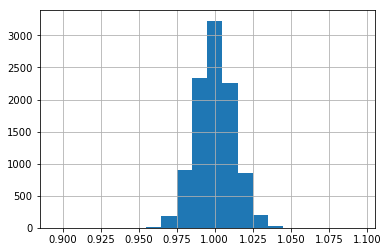

In [103]:
slopes = []
cuts = []
for lr in lrs:
    slopes.append(lr.coef_[0])
    cuts.append(lr.intercept_)

pd.Series(slopes).hist(bins=np.arange(0.895, 1.105, 0.01))
plt.show()

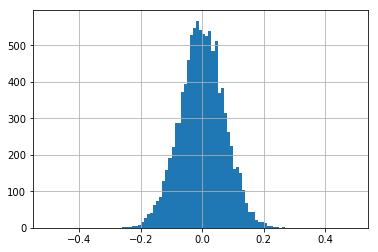

In [105]:
pd.Series(cuts).hist(bins=np.arange(-0.5, 0.5, 0.01))
plt.show()

In [75]:
m = 150
xm = 1 * xn[m, 0]
errm = err[m, :]
ym = yy[m, :]
zm = zz[m, :]
zmm = zm.mean()
er = zm - ym
bias = (zmm - xm)**2
var = np.power((zm - zmm), 2).mean()

print('{:10.8f}'.format(xm))
print()

print('{:10.8f}'.format(errm.mean()))
print('{:10.8f}'.format(errm.std()))
print()

print('{:10.8f}'.format(ym.mean()))
print('{:10.8f}'.format(ym.std()))
print()

print('{:10.8f}'.format(zm.mean()))
print('{:10.8f}'.format(zm.std()))
print()

print('{:10.8f}'.format(er.mean()))
print('{:10.8f}'.format(er.std()))
print('{:10.8f}'.format(er.var()))
print()

print('{:10.8f}'.format(er.var()))
print('{:10.8f}'.format(bias))
print('{:10.8f}'.format(var))
print()

print('{:10.8f}'.format(er.var()))
print('{:10.8f}'.format(bias+var+ym.var()))

5.00000000

-0.01817007
0.99924763

4.98182993
0.99924763

5.00105346
0.09177234

0.01922353
0.99547331
0.99096711

0.99096711
0.00000111
0.00842216

0.99096711
1.00691909


In [112]:
ers = []
sums = []
for m in range(yy.shape[0]):
    xm = 1 * xn[m, 0]
    errm = err[m, :]
    ym = yy[m, :]
    zm = zz[m, :]
    zmm = zm.mean()
    er = zm - ym
    bias = (zmm - xm)**2
    var = np.power((zm - zmm), 2).mean()
    ers.append(er.var())
    sums.append(bias+var+ym.var())
    
ers = np.array(ers)
sums = np.array(sums)

In [87]:
np.abs(sums - ers).mean()

0.01938330837697193

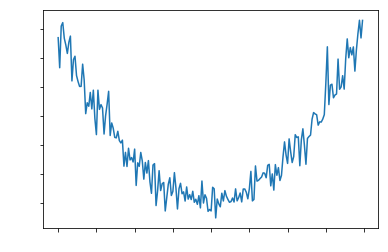

In [118]:
plt.plot(xn[:, 0], sums - ers)
plt.xticks(color=(1,1,1))
plt.yticks(color=(1,1,1))
plt.show()

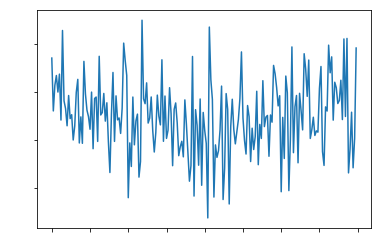

In [126]:
plt.plot(xn[:, 0], sums)
plt.xticks(color=(1,1,1))
plt.yticks(color=(1,1,1))
plt.show()

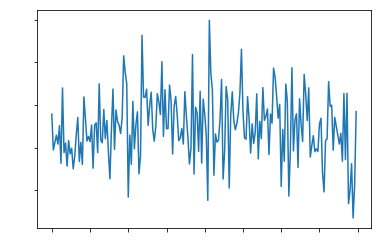

In [125]:
plt.plot(xn[:, 0], ers)
plt.xticks(color=(1,1,1))
plt.yticks(color=(1,1,1))
plt.show()

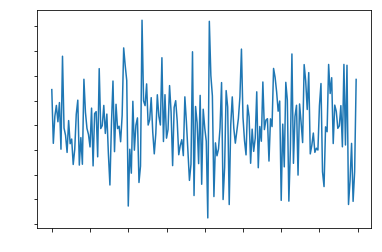

In [124]:
plt.plot(xn[:, 0], err.var(axis=1))
plt.xticks(color=(1,1,1))
plt.yticks(color=(1,1,1))
plt.show()

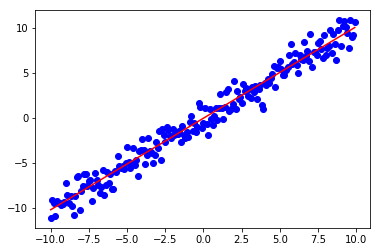

In [226]:
plt.scatter(x, yy[:, 0], c='b')
plt.plot(x, zz[:, 0], 'r')
plt.show()